### 1 数据清洗

手机号码格式
共11位，前三位是网络识别号，4到7位是地区编码，8到11位才是用户的号码(随机分配)
中国电信+中国卫通
手机号码开头数字 133、142、144、146、148、149、153、180、181、189

中国联通+中国网通
手机号码开头数字 130、131、132、141、143、145、155、156、185、186

中国移动+中国铁通
手机号码开头数字 134、135、136、137、138、139、140、147、150、151、152、157、158、159、182、183、187、188

1XX-XXXX- XXXX

In [2]:
from numpy import loadtxt
import numpy as np
import pandas as pd

# 导入数据函数
def input_csv(filename:str, to_list:bool = False):
    # !!!文件名
    
    # 导入文件，注意编码为gbk，不然无法打开中文
    data = pd.read_csv(filename, encoding="gb18030")

    # 将DataFrame转化为list
    if to_list:
        data = np.array(data).tolist()

    # 这个data的返回值没有表头，
    # 因为np.array(data)已经把表头去掉了

    return data  

In [3]:
filename = "数据集_找到网人力资源数据.csv"
data = input_csv(filename)
data

,是否认证,姓名,部门-职务,公司名称,工作内容,qq,email,tel,公司是否认证,注册资金,公司成立时间,公司年龄,教育经历,工作经历
0,1,陈文才,客户经理,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,1,200万,2017/1/20,1年,重庆科技学院 1 热能与动力工程 2012-08-01 2016-06-01,重庆心联宇科技有限公司
1,1,黄彬,总部 执行董事,重庆善古堂科技有限公司,NaN,NaN,NaN,NaN,1,100万,2009/5/25,9年,第一军医大学 1 临床医学系 1990-01-01 1993-01-01,重庆善古堂科技有限公司 总部 执行董事 2008-05-01 现在
2,1,李玉萍,短信营销部 销售经理,北京亿美软通科技有限公司广州分公司,短信群发推广，短信验证码,NaN,NaN,NaN,1,NaN,2010/9/27,7年,广东农工商职业技术学院 0 市场营销 2014-09-01 2017-06-01,北京亿美软通科技有限公司广州分公司 短信营销部 销售经理
3,1,黄勇钦,市场部 大客户销售经理,重庆亿邦运输有限责任公司,川渝地区的仓储配送业务以及西南地区网络招商加盟。,NaN,NaN,NaN,1,200万,2009/1/7,9年,NaN,重庆亿邦运输有限责任公司
4,1,王旺,市场部 销售经理,深圳市深米网络科技有限公司,极速上线小程序,NaN,NaN,NaN,1,1000万,2014/5/30,4年,NaN,深圳深米网络科技有限公司
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1,吕斌,总经办 总经理,宁波市众协国际货运代理有限公司,公司整体经营运作,NaN,NaN,NaN,1,500万,2009/2/13,9年,NaN,NaN
7480,1,吉凯凯,360销售事业部 网络运营,北京全时天地在线网络信息股份有限公司,网络运营,NaN,NaN,NaN,1,4500万,2005/12/30,12年,NaN,北京全时天地在线网络信息股份有限公司 360销售事业部 网络运营
7481,1,吴巧龙,置业顾问,北京首开万科房地产开发有限公司,NaN,NaN,NaN,NaN,1,1亿,2013/3/8,5年,河北地质大学 1 工商管理 2011-09-01 2015-06-01,北京首开万科房地产开发有限公司 置业顾问
7482,0,客户经理,客户经理,上海易谷网络科技有限公司,NaN,NaN,NaN,NaN,1,5000万,2008/1/31,10年,NaN,上海易谷网络科技有限公司 大客户经理


In [4]:
import re
def isPhoneLegial(str) -> bool:
    pattern = re.compile(r'^(13[0-9]|14[0|5|6|7|9]|15[0|1|2|3|5|6|7|8|9]|'
                            r'16[2|5|6|7]|17[0|1|2|3|5|6|7|8]|18[0-9]|'
                            r'19[1|3|5|6|7|8|9])\d{8}$')
    if pattern.search(str):
        return True;
    else:
        return False;

In [5]:
filename = "数据集_找到网人力资源数据.csv"
data = input_csv(filename)

newData = pd.DataFrame()
newData.loc[:, '是否认证'] = data['是否认证']
newData.loc[:, '姓名'] = data['姓名']
newData.loc[:, '公司名称'] = data['公司名称']

for index in range(len(data)):
    if np.isnan(data['tel'][index]):
        newData.loc[index, 'tel'] = data['tel'][index]
        continue
    if not isPhoneLegial(str(int(data['tel'][index]))):
        print("不符合: "+str(index))
        newData.loc[index, 'tel'] = np.nan
    else:
        newData.loc[index, 'tel'] = str(int(data['tel'][index]))
newData

不符合: 5602


,是否认证,姓名,公司名称,tel
0,1,陈文才,重庆心联宇科技有限公司,NaN
1,1,黄彬,重庆善古堂科技有限公司,NaN
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,NaN
3,1,黄勇钦,重庆亿邦运输有限责任公司,NaN
4,1,王旺,深圳市深米网络科技有限公司,NaN
...,...,...,...,...
7479,1,吕斌,宁波市众协国际货运代理有限公司,NaN
7480,1,吉凯凯,北京全时天地在线网络信息股份有限公司,NaN
7481,1,吴巧龙,北京首开万科房地产开发有限公司,NaN
7482,0,客户经理,上海易谷网络科技有限公司,NaN


In [6]:
import re
def isDate(str) -> bool:
    pattern = re.compile(r'\d{4}[-/]\d{1,2}[-/]\d{1,2}')
    if pattern.search(str):
        return True;
    else:
        return False;

In [7]:
counter, nan = 0, 0
for index in range(len(data)):
    if pd.isna(data['公司成立时间'][index]):
        newData.loc[index, '公司成立时间'] = np.nan
        continue
    if isDate(str(data['公司成立时间'][index])):
        newData.loc[index, '公司成立时间'] = data['公司成立时间'][index].replace('/','-')
        counter += 1
    else:
        newData.loc[index, '公司成立时间'] = np.nan
        nan += 1
print("更换的格式", counter)
print("更换的字符串", nan)

更换的格式 6971
更换的字符串 2


In [8]:
counter, nan = 0, 0
for index in range(len(data)):
    if pd.isna(data['公司年龄'][index]):
        newData.loc[index, '公司年龄'] = np.nan
        continue
    if str(data['公司年龄'][index]) == '不足一年':
        newData.loc[index, '公司年龄'] = 0.5
        counter += 1
    else:
        newData.loc[index, '公司年龄'] = int(data['公司年龄'][index].replace('年',''))
        counter += 1
print("更换的年龄", counter)
newData.head()

更换的年龄 6971


,是否认证,姓名,公司名称,tel,公司成立时间,公司年龄
0,1,陈文才,重庆心联宇科技有限公司,NaN,2017-1-20,1.0
1,1,黄彬,重庆善古堂科技有限公司,NaN,2009-5-25,9.0
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,NaN,2010-9-27,7.0
3,1,黄勇钦,重庆亿邦运输有限责任公司,NaN,2009-1-7,9.0
4,1,王旺,深圳市深米网络科技有限公司,NaN,2014-5-30,4.0


In [9]:
def email_check(str):
    pattern = re.compile(r'^\w+([-+.]\w+)*@\w+([-.]\w+)*\.\w+([-.]\w+)*$')

    return bool(pattern.search(str))

for i in range(len(data)):
    if  pd.isna(data['email'][i]):
        newData.loc[i, 'email'] = np.nan
        continue
    if email_check( data['email'][i] ) == 1:
        newData.loc[i, 'email'] = data['email'][i]
        continue
    else:
        newData.loc[i, 'email'] = np.nan

In [10]:
# 处理注册资金
def money_check(str):
    pattern = re.compile(r'[ \u5143 | \u4e07 | \u4ebf]$')   # 以元，万，亿结尾

    return bool(pattern.search(str))

money = []  # 记录数字形式的资金

for i in range(len(data)):
    if  pd.isna(data['注册资金'][i]):
        newData.loc[i, '注册资金'] = np.nan
        money.append(0)
        continue
    if money_check( data['注册资金'][i] )==1:
        newData.loc[i, '注册资金'] = data['注册资金'][i]
        newData.loc[i, '注册资金'] = newData['注册资金'][i].replace('元','')
        newData.loc[i, '注册资金'] = newData['注册资金'][i].replace('万','e4')
        newData.loc[i, '注册资金'] = newData['注册资金'][i].replace('亿','e8')
        money.append(eval(newData['注册资金'][i]))
    else:   # 不合规范或者为空的时候
        money.append(0)
    
newData['注册资金'] = np.array(money).astype(int)  # 由str变为int数组



# 数据概化
# 注册资金等级
money_level = ["1000万以下","1000万以上5000万以下","5000万以上1亿以下","1亿以上"]
money_digit = []
for i in range(len(data)):
    if newData['注册资金'][i] <= 1e7:
        money_digit.append(money_level[0])
    elif newData['注册资金'][i] <= 5e7:
        money_digit.append(money_level[1])
    elif newData['注册资金'][i] <= 1e8:
        money_digit.append(money_level[2])
    else:
        money_digit.append(money_level[3])

newData['注册资金等级'] = np.array(money_digit)

In [11]:
# 部门-职务
depart = []
for i in range(len(data)):
    if pd.isna(data['部门-职务'][i]):
        depart.append(["",""])
        continue
    depart.append(data['部门-职务'][i].strip().split(" "))
    if (len(depart[i])<2):
        depart[i].append("")
    if (len(depart[i])>2):
        del depart[i][0:len(depart[i])-2]

temp = np.array(depart)
newData['部门'] = temp[:,0]
newData['职务'] = temp[:,1]

In [12]:
# 职业等级 job_level
job_level = ['A级','B级','C级','D级','E级']
pattern_jla = re.compile(r'董事|主席')
pattern_jlb = re.compile(r'总经理|总裁|副总经理')
pattern_jlc = re.compile(r'总监|副总监|经理|副经理|主任|主管')
pattern_jld = re.compile(r'工程师|\w{1,2}员$|实习生')
pattern_job_level = [pattern_jla,pattern_jlb,pattern_jlc,pattern_jld]
job_level_temp = []
for i in range(len(newData)):
    flag = 0
    for j in range(len(job_level)-1):
        if (pattern_job_level[j].search(newData['职务'][i])):
            job_level_temp.append(job_level[j])
            flag = 1
            break
    if flag == 0:
        job_level_temp.append('E级')

newData['职务等级'] = np.array(job_level_temp)


In [13]:
# 工作类别 job_class
job_class = ["市场类","技术类","营销类","其他类"]
pattern_jca = re.compile(r'销售|市场|客户')
pattern_jcb = re.compile(r'业务|技术|项目')
pattern_jcc = re.compile(r'营销|宣传')
pattern_jcd = re.compile(r'财务|运营|行政|人力')
pattern_job_class = [pattern_jca,pattern_jcb,pattern_jcc,pattern_jcd]
job_class_temp = []
for i in range(len(newData)):
    flag = 0
    for j in range(len(job_class)-1):
        if (pattern_job_class[j].search(newData['部门'][i])):
            job_class_temp.append(job_class[j])
            flag = 1
            break
    if flag == 0:
        job_class_temp.append("其他类")

newData['工作类别'] = np.array(job_class_temp)


科技类（关键词“科技/软件/信息技术”等），文化、传媒广告类（关键词“文化/传媒/广告”等）、咨询类（关键词“咨询”等）、管理类（关键词“管理”等）、贸易类（关键词“贸易/商贸/科贸/工贸”等）与其他类（关键词“机械/设备/建筑”等）

In [14]:
compDic = {
    '科技类': ['科技','软件','信息技术'],
    '文化、传媒广告类': ['文化','传媒','广告'],
    '咨询类': ['咨询'],
    '管理类': ['管理'],
    '贸易类': ['贸易','商贸','科贸','工贸'],
    '其他类': ['机械','设备','建筑']
}

for index in range(len(data)):
    if pd.isna(data['公司名称'][index]):
        newData.loc[index, '公司领域'] = '未知'
        continue
    
    flag = False
    for regin in compDic.keys():
        for item in compDic[regin]:
            if item in data['公司名称'][index]:
                newData.loc[index, '公司领域'] = regin
                flag = True
                break
        if flag == True:
            break
        
    if flag == False:
        newData.loc[index, '公司领域'] = '未知'
newData.head()

,是否认证,姓名,公司名称,tel,公司成立时间,公司年龄,email,注册资金,注册资金等级,部门,职务,职务等级,工作类别,公司领域
0,1,陈文才,重庆心联宇科技有限公司,NaN,2017-1-20,1.0,NaN,2000000,1000万以下,客户经理,,E级,市场类,科技类
1,1,黄彬,重庆善古堂科技有限公司,NaN,2009-5-25,9.0,NaN,1000000,1000万以下,总部,执行董事,A级,其他类,科技类
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,NaN,2010-9-27,7.0,NaN,0,1000万以下,短信营销部,销售经理,C级,营销类,科技类
3,1,黄勇钦,重庆亿邦运输有限责任公司,NaN,2009-1-7,9.0,NaN,2000000,1000万以下,市场部,大客户销售经理,C级,市场类,未知
4,1,王旺,深圳市深米网络科技有限公司,NaN,2014-5-30,4.0,NaN,10000000,1000万以下,市场部,销售经理,C级,市场类,科技类


In [17]:
import cpca
addr = cpca.transform(data['公司名称'])
newData.loc[:,'省'] = addr['省']
newData.loc[:,'市'] = addr['市']
newData.loc[:,'区'] = addr['区']

In [18]:
for index in range(len(data)):
    if pd.isna(data['教育经历'][index]):
        continue
    lis = str(data['教育经历'][index]).split('|')
    counter = len(lis)
    for j in range(counter):
        newData.loc[index, '教育经历'+str(j+1)] = lis[j]
newData.head()

,是否认证,姓名,公司名称,tel,公司成立时间,公司年龄,email,注册资金,注册资金等级,部门,...,职务等级,工作类别,公司领域,省,市,区,教育经历1,教育经历2,教育经历3,教育经历4
0,1,陈文才,重庆心联宇科技有限公司,NaN,2017-1-20,1.0,NaN,2000000,1000万以下,客户经理,...,E级,市场类,科技类,重庆市,None,None,重庆科技学院 1 热能与动力工程 2012-08-01 2016-06-01,NaN,NaN,NaN
1,1,黄彬,重庆善古堂科技有限公司,NaN,2009-5-25,9.0,NaN,1000000,1000万以下,总部,...,A级,其他类,科技类,重庆市,None,None,第一军医大学 1 临床医学系 1990-01-01 1993-01-01,NaN,NaN,NaN
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,NaN,2010-9-27,7.0,NaN,0,1000万以下,短信营销部,...,C级,营销类,科技类,北京市,None,None,广东农工商职业技术学院 0 市场营销 2014-09-01 2017-06-01,NaN,NaN,NaN
3,1,黄勇钦,重庆亿邦运输有限责任公司,NaN,2009-1-7,9.0,NaN,2000000,1000万以下,市场部,...,C级,市场类,未知,重庆市,None,None,NaN,NaN,NaN,NaN
4,1,王旺,深圳市深米网络科技有限公司,NaN,2014-5-30,4.0,NaN,10000000,1000万以下,市场部,...,C级,市场类,科技类,广东省,深圳市,None,NaN,NaN,NaN,NaN


In [19]:
for index in range(len(data)):
    if pd.isna(data['工作经历'][index]):
        continue
    lis = str(data['工作经历'][index]).split('|')
    counter = len(lis)
    for j in range(counter):
        newData.loc[index, '工作经历'+str(j+1)] = lis[j]
newData.head()

,是否认证,姓名,公司名称,tel,公司成立时间,公司年龄,email,注册资金,注册资金等级,部门,...,教育经历3,教育经历4,工作经历1,工作经历2,工作经历3,工作经历4,工作经历5,工作经历6,工作经历7,工作经历8
0,1,陈文才,重庆心联宇科技有限公司,NaN,2017-1-20,1.0,NaN,2000000,1000万以下,客户经理,...,NaN,NaN,重庆心联宇科技有限公司,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,黄彬,重庆善古堂科技有限公司,NaN,2009-5-25,9.0,NaN,1000000,1000万以下,总部,...,NaN,NaN,重庆善古堂科技有限公司 总部 执行董事 2008-05-01 现在,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,李玉萍,北京亿美软通科技有限公司广州分公司,NaN,2010-9-27,7.0,NaN,0,1000万以下,短信营销部,...,NaN,NaN,北京亿美软通科技有限公司广州分公司 短信营销部 销售经理,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,黄勇钦,重庆亿邦运输有限责任公司,NaN,2009-1-7,9.0,NaN,2000000,1000万以下,市场部,...,NaN,NaN,重庆亿邦运输有限责任公司,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,王旺,深圳市深米网络科技有限公司,NaN,2014-5-30,4.0,NaN,10000000,1000万以下,市场部,...,NaN,NaN,深圳深米网络科技有限公司,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
newData = newData.dropna(subset=["姓名", "公司名称"])

---------------------------
### 2 数据可视化
#### 2.1 按照数据类型进行图表展示

Text(0.5, 1.0, '公司年龄直方图')

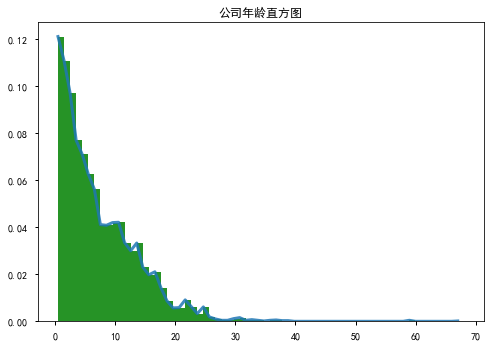

In [21]:
'''
    公司年龄分析，使用直方图进行展示
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('seaborn-notebook')
compAge = np.array(newData['公司年龄'])
n, bins, patches = plt.hist(compAge, bins=67,  density=True, color='g', alpha=0.85)
plt.plot(bins[:-1], n, '-', alpha = 0.85, linewidth = 3)
plt.title('公司年龄直方图')

Text(0.5, 1.0, '公司领域分析')

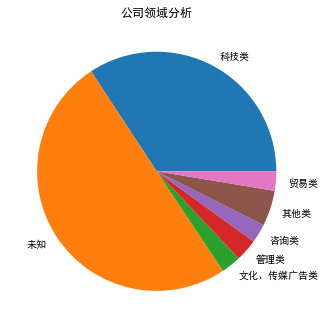

In [22]:
'''
    工作领域分析，使用饼图进行展示
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('seaborn-notebook')
regin = np.array(newData['公司领域'])
reginDic = {}
for item in regin:
    if item in reginDic.keys():
        reginDic[item] += 1
    else:
        reginDic[item] = 1
plt.pie(reginDic.values(), labels = reginDic.keys())
plt.title('公司领域分析')

Text(0.5, 1.0, '工作类别分析')

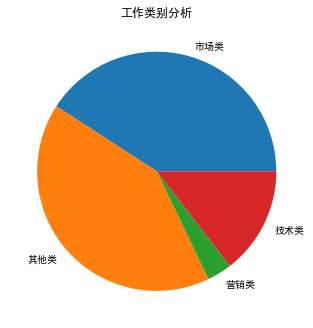

In [23]:
'''
    工作类别分析，使用饼图进行展示
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('seaborn-notebook')
regin = np.array(newData['工作类别'])
reginDic = {}
for item in regin:
    if item in reginDic.keys():
        reginDic[item] += 1
    else:
        reginDic[item] = 1
plt.pie(reginDic.values(), labels = reginDic.keys())
plt.title('工作类别分析')

Text(0.5, 1.0, '职务等级分析')

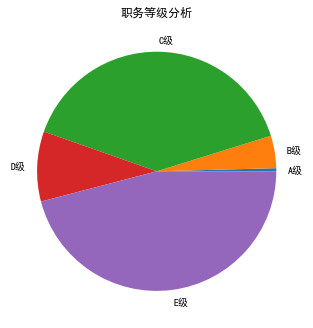

In [24]:
'''
    职务分析，使用饼图和柱状图展示
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('seaborn-notebook')
regin = np.array(newData['职务等级'])
reginDic = {}
for item in regin:
    if item in reginDic.keys():
        reginDic[item] += 1
    else:
        reginDic[item] = 1
label = ['A级', 'B级', 'C级', 'D级', 'E级']
values = [reginDic[label[0]], reginDic[label[1]], reginDic[label[2]], reginDic[label[3]], reginDic[label[4]]]
plt.pie(values, labels = label)
plt.title('职务等级分析')

Text(0.5, 1.0, '职务等级分析')

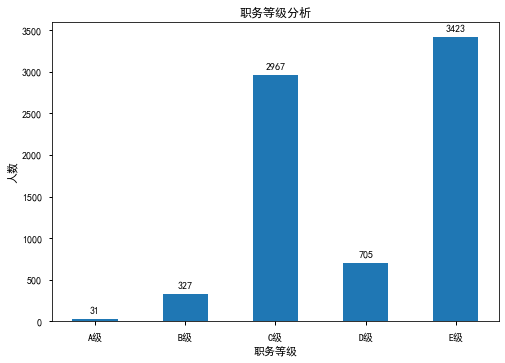

In [25]:
plt.bar(label, values, 0.5)
for a,b in zip(label, values):
    plt.text(a,b + 50,b,ha = 'center', va = 'bottom')
plt.xlabel('职务等级')
plt.ylabel('人数')
plt.title('职务等级分析')

Text(0.5, 1.0, '公司地域分析')

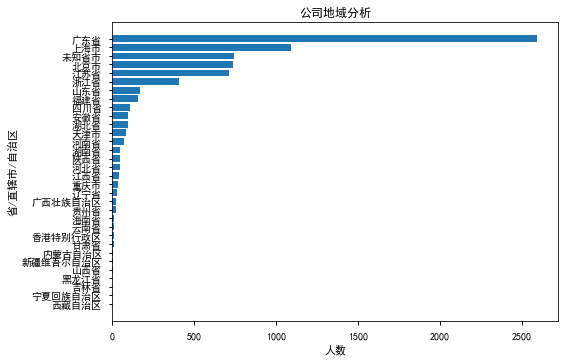

In [26]:
'''
    公司地域分析，使用饼图和柱状图展示
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('seaborn-notebook')
regin = np.array(newData['省'])
reginDic = {}
for item in regin:
    if item == None:
        item = '未知省市'
    if item in reginDic.keys():
        reginDic[item] += 1
    else:
        reginDic[item] = 1
        
reginLis = []
for key in reginDic.keys():
    reginLis.append((key, reginDic[key]))
reginLis = sorted(reginLis, key = lambda x:x[1], reverse = False)
xdata = [reginLis[i][0] for i in range(len(reginLis))]
ydata = [reginLis[i][1] for i in range(len(reginLis))]

plt.barh(xdata, ydata,height = 0.8)
plt.xlabel('人数')
plt.ylabel('省/直辖市/自治区')
plt.title('公司地域分析')

Text(0.5, 1.0, '公司地域分析')

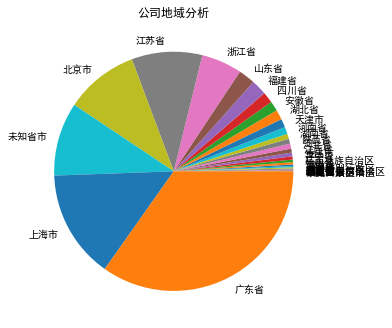

In [27]:
plt.pie(ydata, labels = xdata)
plt.title('公司地域分析')

#### 2.2 相关分析

#### 2.3 对比分析